# Large context with RAG-Fussion

Why RAG-Fusion?

Addressing Gaps: It tackles the constraints inherent in RAG by generating multiple user queries and reranking the results.
Enhanced Search: Utilises Reciprocal Rank Fusion and custom vector score weighting for comprehensive, accurate results.
RAG-Fusion aspires to bridge the gap between what users explicitly ask and what they intend to ask, inching closer to uncovering the transformative knowledge that typically remains hidden.
By combining ranks from different queries, we increase the chances that the most relevant documents will appear at the top of the final lis

# 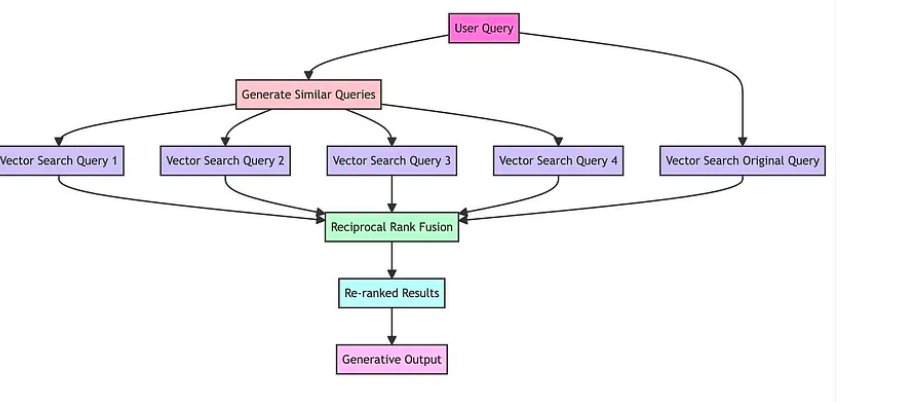

# Install dependencies
Activate T4 on google colab

In [ ]:
!pip  install langchain huggingface_hub==0.22.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip  install unstructured==0.13.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 40.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=9d5a5424fe3966f18b615365094bab5264ca358bb357d958a1034eda88d50210
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip  install sentence_transformers==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install faiss-gpu==1.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.1 MB/s eta 0:00:00


In [ ]:
#!pip install --upgrade huggingface_hub



# Load model and embeddings

Important Note: Go to hugging-face and accept terms and conditions for the model: mistralai/Mixtral-8x7B-Instruct-v0.1

In [ ]:
from langchain.llms import HuggingFaceHub
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = "XXXXXXXXXX"

#repo_id ="llmware/bling-sheared-llama-1.3b-0.1"
#repo_id =  "mistralai/Mistral-7B-Instruct-v0.2"
repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
llm = HuggingFaceHub(repo_id=repo_id,
                     model_kwargs={"temperature":0.1,"max_new_tokens":1000})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 0.2.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(


In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

#model_name = "BAAI/bge-small-en-v1.5"
model_name = "BAAI/bge-m3"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

#embeddings = HuggingFaceBgeEmbeddings(
#    model_name=model_name,
#    model_kwargs={'device': 'cuda'},
#    encode_kwargs=encode_kwargs,
#
#)

#model_kwargs = {"device": "cuda"}
#encode_kwargs = {"normalize_embeddings": True}
#embeddings = HuggingFaceBgeEmbeddings(
#      model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs)
embeddings = HuggingFaceBgeEmbeddings(
      model_name=model_name, encode_kwargs=encode_kwargs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

# Load Documents and splitter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.document_loaders import DirectoryLoader
from langchain.llms import HuggingFaceHub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.prompts import PromptTemplate

path = "/content/drive/MyDrive/data_omar"
#path = '/content/drive/MyDrive/data_omar2'
loader = DirectoryLoader(path, glob="**/*.txt", show_progress=True)
documents = loader.load()

add metadata to each document

In [ ]:
lista = [{"FAQs.txt" : "Troubleshooting "},
         {"Howitworks.txt" : "App Features and Installation Guide"},
         {"about.txt" : "Vision of the company"},


In [ ]:
for document in documents:
  name_doc = document.metadata['source'].split("/")[5]
  for diccionario in lista:
      if name_doc in diccionario:
          valor = list(diccionario.values())[0]
          document.metadata['description'] = valor

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500,
                                               chunk_overlap=150,
                                               length_function = len,
                                               is_separator_regex = False)
texts = text_splitter.split_documents(documents)


Data base

In [ ]:
path_save="/content/drive/MyDrive/data_omar/faiss_db_meta"
#db = FAISS.from_documents(texts, embeddings)

In [ ]:
db.save_local(path_save)

In [ ]:
db = FAISS.load_local(path_save, embeddings, allow_dangerous_deserialization=True)

# NORMAL RAG

In [ ]:
from operator import itemgetter

from langchain.chat_models import ChatGooglePalm

from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [ ]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

model = llm

In [ ]:
retriever = db.as_retriever(k=2)

In [ ]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [ ]:
response= chain.invoke("Tell me what is zahore")
print(response)

Human: Answer the question based only on the following context:
[Document(page_content="These are the companies and brands that Zahoree provides support services to: these are Zahoree's customers: Zahoree provides its services to brands in need of specialized customer service. The following list includes Zahoree's current clients.\n\n1. Infinitus\n\n2. August\n\n3. Yale\n\n4. ThirdLove\n\n5. Koho\n\n6. 8Sleep\n\n7. EarnUp\n\nZahoree provides customer support services to ThirdLove.", metadata={'source': '/content/drive/MyDrive/data_omar/zahoree.txt', 'description': 'Information about Zahoree Virtual Teams'}), Document(page_content='Email: hr@zahoree.ai or info@zahoree.ai Phone: +52 656 566 0838 Extensions: 4037, 4024, 4030, 4019, 4025 For WhatsApp, send us a message at: https://wa.me/526567435495" } { If you are unable to save some information or document, please check that you have made all the necessary changes and that the information is accurate. If the issue persists, try refreshin

# With RAG Fussion

In [ ]:
from langchain.chat_models import ChatGooglePalm
from langchain.schema.output_parser import StrOutputParser
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.prompts import ChatMessagePromptTemplate, PromptTemplate

In [ ]:
prompt = ChatPromptTemplate(input_variables=['original_query'],
                           messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[],
                           template='You are a helpful assistant that generates multiple search queries based on a single input query.')),
                           HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['original_query'],
                                                      template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'))])

In [ ]:
#prompt

Generate the 4 related queries

In [ ]:
generate_queries = (
    prompt |llm | StrOutputParser() | (lambda x: x.split("\n"))
)

Aggregate and refine all the results using reciprocal rank fusion.

In [ ]:
from langchain.load import dumps, loads


def reciprocal_rank_fusion(results: list[list], k=60):
    fused_scores = {}
    for docs in results:
        # Assumes the docs are returned in sorted order of relevance
        for rank, doc in enumerate(docs):
            doc_str = dumps(doc)
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            previous_score = fused_scores[doc_str]
            fused_scores[doc_str] += 1 / (rank + k)

    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]
    return reranked_results

In [ ]:
retriever = db.as_retriever(k=2)

In [ ]:
ragfusion_chain = generate_queries | retriever.map() | reciprocal_rank_fusion

In [ ]:
#ragfusion_chain.input_schema.schema()

In [ ]:
#ragfusion_chain.invoke({"question": original_query})

In [ ]:
from langchain.schema.runnable import RunnablePassthrough
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

full_rag_fusion_chain = (
    {
        "context": ragfusion_chain,
        "question": RunnablePassthrough()
    }
    | prompt
    | model
    | StrOutputParser()
)

In [ ]:
#original_query = "what is zahoree"

In [ ]:
#full_rag_fusion_chain.input_schema.schema()

In [ ]:
question  = "what is zahoree"
response = full_rag_fusion_chain.invoke({"question": question})


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


In [ ]:
response.split('Question')[1]

": {'question': 'what is zahoree'}\n\nAnswer: Based on the provided context, Zahoree is a company that provides support services to various brands. It has a platform called CX Virtual Teams and has rebranded from Infolink."

In [ ]:
question  = "tell me 5 products that recived feedback by customers"
response = full_rag_fusion_chain.invoke({"question": question})
response.split('Question')[1]

": {'question': 'tell me 5 products that recived feedback by customers'}\n\nAnswer: Based on the provided context, here are 5 products that have received feedback from customers:\n\n1. Underwire Popping Out\n2. Sports Bras\n3. Fabrics > Other\n4. Straps > other\n5. Product Feedback > Negative\n\nThese are not specific products but rather categories or issues related to products that have received feedback. The exact products are not mentioned in the context."

In [ ]:
question  = "which courses can i take on zahoree academy"
response =full_rag_fusion_chain.invoke({"question": question})
response.split('Question')[1]

In [ ]:
response

'Human: Answer the question based only on the following context:\n[(Document(page_content=\'Email: hr@zahoree.ai or info@zahoree.ai Phone: +52 656 566 0838 Extensions: 4037, 4024, 4030, 4019, 4025 For WhatsApp, send us a message at: https://wa.me/526567435495" } { If you are unable to save some information or document, please check that you have made all the necessary changes and that the information is accurate. If the issue persists, try refreshing the page or logging out and logging back in. If the problem still persists, please contact the customer service team for further assistance. } { Always, at the end of a conversation where questions are answered, put this: "If you have further questions or if the issue remains unresolved, please get in touch with our support team at the email address info@zahoree.ai." } { The full hiring process is the following:\\n\\n1-Apply though the virtual teams platform to kick off the process. 2-The recruitment team will follow up with interviews, in

In [ ]:
question  = "what is a smartlock"
response =full_rag_fusion_chain.invoke({"question": question})
response.split('Question')[1]

": {'question': 'what is a smartlock'}\n\nAnswer: Based on the provided context, a smartlock is a type of smart device that can connect, share and interact with its user and other smart devices. It is generally connected to other devices or networks via different wireless protocols such as Bluetooth, Zigbee, NFC, Wi-Fi, LiFi, 5G, etc. Smart locks can be used to remotely lock or unlock the door, check door status, grant virtual guest keys, and see who’s coming and going. They can operate at the edge of the network or on very small endpoints, and while they may be small, they are powerful enough to process data without having to report back into the cloud."

In [ ]:
question  = "Generate an email template response for a customer support interaction about forgoten  password on virtual teams"
response =full_rag_fusion_chain.invoke({"question": question})
response.split('Question')[1]

': {\'question\': \'Generate an email template response for a customer support interaction about forgoten  password on virtual teams\'}\n\nAnswer: Subject: Password Reset Request for Zahoree Virtual Teams\n\nDear [Customer Name],\n\nThank you for reaching out to us regarding your password reset request for Zahoree Virtual Teams. We apologize for any inconvenience you may have experienced.\n\nTo reset your password, please follow these steps:\n\n1. Visit the Zahoree Virtual Teams login page.\n2. Click on the "Forgot Password" link.\n3. Enter your registered email address and click "Submit".\n4. You will receive an email with a password reset link.\n5. Click on the link and follow the instructions to create a new password.\n\nIf you encounter any issues during the password reset process, please don\'t hesitate to contact us again. Our customer support team is available 24/7 to assist you.\n\nThank you for your patience and understanding. We appreciate your loyalty to Zahoree Virtual Team

In [ ]:
response

'Human: Answer the question based only on the following context:\n[(Document(page_content=\'{ Infolink had a rebrand and is now called "Zahoree", and this has a platform called CX Virtual Teams } { Common errors:\\n\\n1-Error in sign up, password related a. Try a new password,  it must be at least 8 characters including a lowercase letter, an uppercase letter, a number and a special character(^$*. []{} ( ) ? - ! @ # % & / , > \\\' : ; | _ ~ ` + =)\\n\\n2-User interface not responding or showing information not related to my user a. Try to logout, then a hard refresh on your browser (commonly ctrl+F5) and the login again.\\n\\n3-Recovery password or email to reset password not working a. Please write to info@zahoree.ai for support. }\\n\\nThe following texts are instructions on how to do certain things on the zahoree virtual teams page with the candidate profile.\\n\\n{ If you are unable to save some information or document, please check that you have made all the necessary changes and 

In [ ]:
question  = "Generate an email template response for a customer support interaction about forgoten  password on virtual teams"
response =full_rag_fusion_chain.invoke({"question": question})
response.split('Question')[1]